<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub
import pandas as pd


file_path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

csv_path = file_path + "/healthcare-dataset-stroke-data.csv"

df = pd.read_csv(csv_path)

print("First 5 records:\n", df.head())


First 5 records:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
27.7,37
27.6,37
26.7,37
...,...
47.9,1
13.0,1
13.9,1


In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/tmp/ipython-input-3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
df['bmi'].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
cattw = [x for x in df.columns if df[x].dtype == 'O']
cat = [x for x in df.columns if df[x].dtype == 'O']
colsnumerical = [x for x in df.columns if df[x].dtype != 'O']
cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
cattw = [x for x in cat if x not in ['work_type' , 'smoking_status']]
print(cattw)
cat = [x for x in cat if x not in ['gender', 'ever_married', 'Residence_type']]
print(cat)

['gender', 'ever_married', 'Residence_type']
['work_type', 'smoking_status']


In [ ]:
# df['bmi'].unique()

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='bmi', ylabel='Count'>

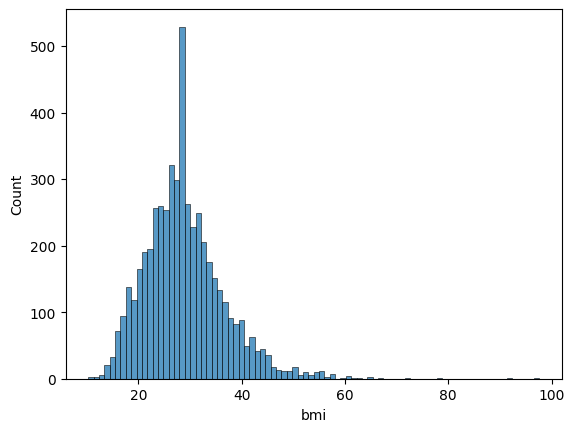

In [ ]:
sns.histplot(data=df , x='bmi')

<Axes: xlabel='hypertension', ylabel='Count'>

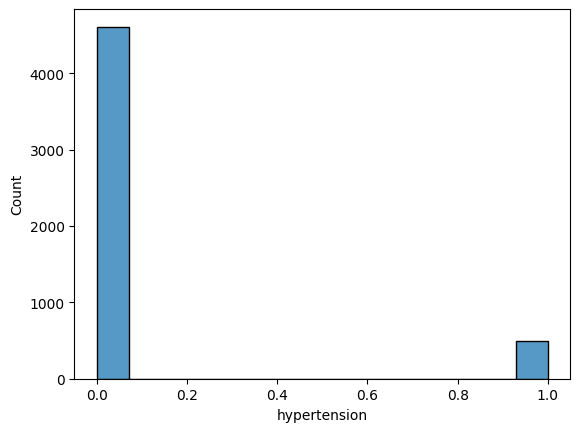

In [ ]:
sns.histplot(data=df , x='hypertension')

In [ ]:
df[df['hypertension'] == 1.0].count()

,0
id,498
gender,498
age,498
hypertension,498
heart_disease,498
ever_married,498
work_type,498
Residence_type,498
avg_glucose_level,498
bmi,498


In [ ]:
df['bmi'].max()

97.6

In [ ]:
df[df['bmi'] == 97.6]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [ ]:
# def out(x):
#     Q1 = df[x].quantile(0.25)
#     Q3 = df[x].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

# for i in colsnumerical:
#   df = out(i)


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('stroke' , axis=1)
y = df['stroke']
xn , xs , yn , ys = train_test_split(x, y ,random_state=40 , test_size=0.2 , stratify=y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder



In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
enc = ce.OrdinalEncoder(cols = cattw)
enh = ce.OneHotEncoder(cols = cat)

xn = enc.fit_transform(xn)
xs = enc.transform(xs)

xn = enh.fit_transform(xn)
xs = enh.transform(xs)

In [ ]:
xn.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type,avg_glucose_level,bmi,smoking_status_1,smoking_status_2,smoking_status_3,smoking_status_4
1515,72474,1,82.0,0,0,1,1,0,0,0,0,1,58.30,20.4,1,0,0,0
4591,6576,1,33.0,0,0,1,0,1,0,0,0,2,84.48,23.2,0,1,0,0
2390,9986,1,60.0,0,0,1,0,1,0,0,0,2,85.13,24.6,0,0,1,0
3624,12117,2,8.0,0,0,2,0,0,1,0,0,2,84.68,14.5,0,0,1,0
2894,32446,1,44.0,0,0,1,0,1,0,0,0,1,97.27,26.0,1,0,0,0


In [ ]:
xn.drop('id' , axis=1 , inplace=True)
xs.drop('id' , axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

xn[['age' , 'avg_glucose_level' , 'bmi']] = sc.fit_transform(xn[['age' , 'avg_glucose_level' , 'bmi']])
xs[['age' , 'avg_glucose_level' , 'bmi']] = sc.transform(xs[['age' , 'avg_glucose_level' , 'bmi']])

In [ ]:
xn.head()

,gender,age,hypertension,heart_disease,ever_married,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type,avg_glucose_level,bmi,smoking_status_1,smoking_status_2,smoking_status_3,smoking_status_4
1515,1,1.000000,0,0,1,1,0,0,0,0,1,0.014955,0.105446,1,0,0,0
4591,1,0.401855,0,0,1,0,1,0,0,0,2,0.138074,0.137891,0,1,0,0
2390,1,0.731445,0,0,1,0,1,0,0,0,2,0.141131,0.154114,0,0,1,0
3624,2,0.096680,0,0,2,0,0,1,0,0,2,0.139014,0.037080,0,0,1,0
2894,1,0.536133,0,0,1,0,1,0,0,0,1,0.198222,0.170336,1,0,0,0


In [ ]:
xn.reset_index(drop=True, inplace=True)
xs.reset_index(drop=True, inplace=True)


In [ ]:
xn.head()

,gender,age,hypertension,heart_disease,ever_married,work_type_1,work_type_2,work_type_3,work_type_4,work_type_5,Residence_type,avg_glucose_level,bmi,smoking_status_1,smoking_status_2,smoking_status_3,smoking_status_4
0,1,1.000000,0,0,1,1,0,0,0,0,1,0.014955,0.105446,1,0,0,0
1,1,0.401855,0,0,1,0,1,0,0,0,2,0.138074,0.137891,0,1,0,0
2,1,0.731445,0,0,1,0,1,0,0,0,2,0.141131,0.154114,0,0,1,0
3,2,0.096680,0,0,2,0,0,1,0,0,2,0.139014,0.037080,0,0,1,0
4,1,0.536133,0,0,1,0,1,0,0,0,1,0.198222,0.170336,1,0,0,0


In [ ]:
xn.shape , xs.shape

((4088, 17), (1022, 17))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(criterion='gini' , max_depth=3 , random_state=40)

ds.fit(xn , yn)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [ ]:
yp = ds.predict(xs)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cr = classification_report(ys, yp)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
acc = accuracy_score(ys , yp)
print(acc)

0.9510763209393346


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
xtrain , ytrain = sm.fit_resample(xn , yn)

ds = DecisionTreeClassifier(criterion='entropy',max_depth=10 , random_state=40 , class_weight='balanced')

ds.fit(xtrain , ytrain)

yp = ds.predict(xs)


cr = classification_report(ys, yp)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.12      0.48      0.19        50

    accuracy                           0.80      1022
   macro avg       0.54      0.65      0.54      1022
weighted avg       0.93      0.80      0.85      1022



In [ ]:
acc = accuracy_score(ys , yp)
print(acc)

0.7984344422700587
